d:\ana\envs\dl\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


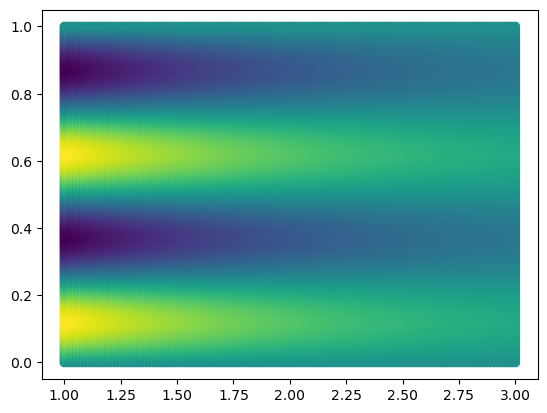

In [1]:
import sys
sys.path.append('../')

import torch
import numpy as np

from user_funn import field,get_net,ds,solver,pde,bc,geom

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = get_net.ForwardNetwork([1, 32, 32, 32, 1]).to(device)
loss_fn = torch.nn.MSELoss()

# define question
n = 4
a = 0.005
L = 1
tmax = 3

# get ana-solution
import heat_benchmark 
bm = heat_benchmark.HeatBenchMark(n,a,L,tmax)
X,y_true = bm.gen_testdata()
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c = y_true)

In [ ]:
# 保证迭代参数与DEEPXDE一致
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
loss_fn = torch.nn.MSELoss()

# hyperparameter config
model_num = 3
overlap_length = 0.1

def time_dc_train(solver_train_args_list, ic_cp_only_space, t0_val,
    overlap_length)
        solver_train_args_list: 每个元素为solver运行需要的参数（初值条件除外）
        ic_cp_only_space：代表空间域的cloud point二维数组
        t0_val: 长度应与ic_cp_only_space相同
        overlap_length